In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

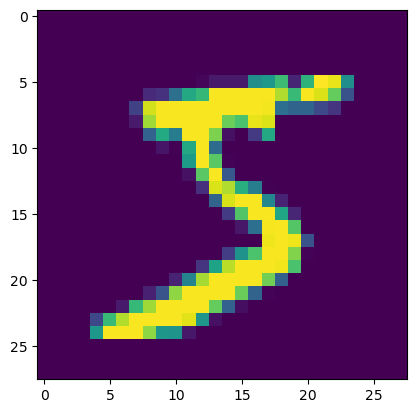

In [7]:
plt.imshow(X_train[0])

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train_Flatten = X_train.reshape(len(X_train), 28*28)
X_test_Flatten = X_test.reshape(len(X_test), 28*28)

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_Flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2739 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9840


In [46]:
model.evaluate(X_test_Flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9766


[0.08033544570207596, 0.9765999913215637]

In [47]:
y_pred = model.predict(X_test_Flatten)

313/313 [==============================] - 1s 1ms/step


In [48]:
np.argmax(y_pred[1])

2

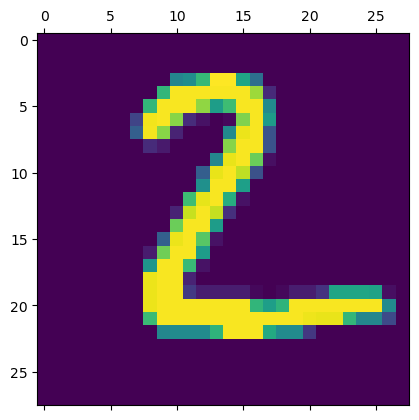

In [49]:
plt.matshow(X_test[1])

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [50]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [51]:
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [52]:
cm = tf.math.confusion_matrix(y_test, y_pred_label)

Text(58.222222222222214, 0.5, 'Truth')

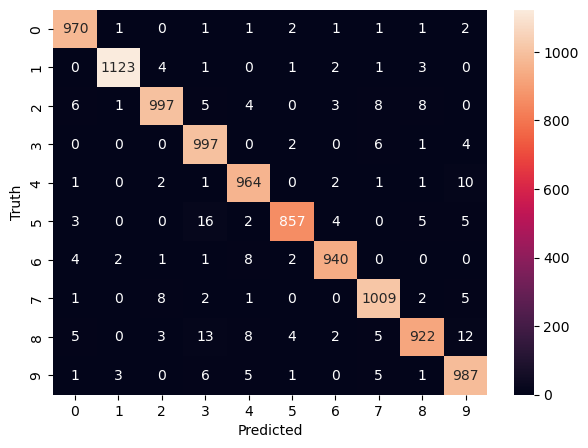

In [53]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [56]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9761


[0.08426748216152191, 0.9761000275611877]

In [58]:
y_pred = model1.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [59]:
np.argmax(y_pred[0])

7

In [61]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [62]:
cm = tf.math.confusion_matrix(y_test, y_pred_label)

Text(58.222222222222214, 0.5, 'Truth')

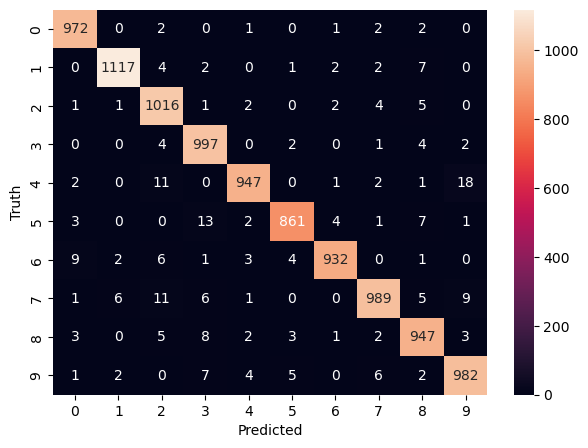

In [64]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')